In [1]:
import os
import sys
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# from   getdist       import plots, MCSamples 
from   astropy.table import Table
import pubplot

In [2]:
sys.path.append(os.environ['HOME'] + '/DESI/')

In [3]:
from   schechter     import schechter, named_schechter

In [4]:
gama_vmax = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_vmax.fits')
gama_vmax

ZGAMA,ZMIN,ZMAX,MCOLOR_0P0,VMAX,VZ
,,,mag,,
float32,float64,float64,float64,float64,float64
0.08332,0.03903000056743622,0.08582235568257114,-17.28288200453336,267528.2071202171,242775.6461894515
0.25293,0.03903000056743622,0.25840545857317754,-19.57819528092627,7224854.989407693,6797895.7741051605
0.15081,0.03903000056743622,0.2295906335782965,-19.83317066958331,5155266.214126108,1515919.092711623
0.11158,0.03903000056743622,0.22928748445538527,-19.82472623096576,5135772.103434861,612198.9929706616
0.14049,0.03903000056743622,0.18038699378072803,-19.24496856686621,2566006.5497457627,1228052.4958238814
0.25699,0.03903000056743622,0.26298999786376953,-20.978091889010262,7594841.612883208,7112931.02371151
0.1138,0.03903000056743622,0.20768621673763388,-19.15170954475067,3863093.1522298027,650298.1043759851
0.13387,0.03903000056743622,0.26298999786376953,-20.33575346103273,7594841.612883208,1063093.454039089


In [5]:
gama_lf              = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_lumfn.fits')
gama_lf['S2N_N']     = gama_lf['PHI_N'] / gama_lf['PHI_N_ERROR']
gama_lf['S2N_IVMAX'] = gama_lf['PHI_IVMAX'] / gama_lf['PHI_IVMAX_ERROR']
gama_lf

/tmp/ipykernel_22781/1789927872.py:2: RuntimeWarning: invalid value encountered in true_divide
  gama_lf['S2N_N']     = gama_lf['PHI_N'] / gama_lf['PHI_N_ERROR']
/tmp/ipykernel_22781/1789927872.py:3: RuntimeWarning: invalid value encountered in true_divide
  gama_lf['S2N_IVMAX'] = gama_lf['PHI_IVMAX'] / gama_lf['PHI_IVMAX_ERROR']


MEDIAN_M,PHI_N,PHI_N_ERROR,PHI_IVMAX,PHI_IVMAX_ERROR,N,V_ON_VMAX,S2N_N,S2N_IVMAX
float64,float64,float64,float64,float64,float64,float64,float64,float64
--,0.0,0.0,0.0,0.0,0.0,--,nan,nan
--,0.0,0.0,0.0,0.0,0.0,--,nan,nan
--,0.0,0.0,0.0,0.0,0.0,--,nan,nan
--,0.0,0.0,0.0,0.0,0.0,--,nan,nan
--,0.0,0.0,0.0,0.0,0.0,--,nan,nan
--,0.0,0.0,0.0,0.0,0.0,--,nan,nan
--,0.0,0.0,0.0,0.0,0.0,--,nan,nan
--,0.0,0.0,0.0,0.0,0.0,--,nan,nan
--,0.0,0.0,0.0,0.0,0.0,--,nan,nan


/tmp/ipykernel_22781/719830864.py:6: RuntimeWarning: divide by zero encountered in log10
  pl.errorbar(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), gama_lf['PHI_N_ERROR'] / gama_lf['PHI_N'] / np.log(10.), label='NOWEIGHT', alpha=0.4)
/tmp/ipykernel_22781/719830864.py:6: RuntimeWarning: invalid value encountered in true_divide
  pl.errorbar(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), gama_lf['PHI_N_ERROR'] / gama_lf['PHI_N'] / np.log(10.), label='NOWEIGHT', alpha=0.4)
/tmp/ipykernel_22781/719830864.py:7: RuntimeWarning: divide by zero encountered in log10
  pl.errorbar(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), gama_lf['PHI_IVMAX_ERROR'] / gama_lf['PHI_IVMAX'] / np.log(10.), label='IVMAX')
/tmp/ipykernel_22781/719830864.py:7: RuntimeWarning: invalid value encountered in true_divide
  pl.errorbar(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), gama_lf['PHI_IVMAX_ERROR'] / gama_lf['PHI_IVMAX'] / np.log(10.), label='IVMAX')


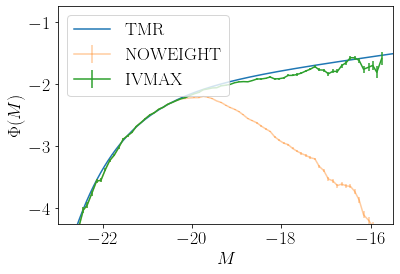

In [6]:
Ms = np.arange(-23., -15., 0.01)
sc = named_schechter(Ms, named_type='TMR')

pl.plot(Ms, np.log10(sc), label='TMR')

pl.errorbar(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), gama_lf['PHI_N_ERROR'] / gama_lf['PHI_N'] / np.log(10.), label='NOWEIGHT', alpha=0.4)
pl.errorbar(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), gama_lf['PHI_IVMAX_ERROR'] / gama_lf['PHI_IVMAX'] / np.log(10.), label='IVMAX')

pl.xlabel(r'$M$')
pl.ylabel(r'$\Phi(M)$')

pl.ylim(-4.25, -.75)
pl.xlim(-23., -15.5)

pl.legend(frameon=True, loc=2)

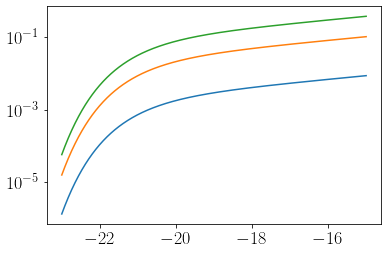

In [7]:
for d8 in [-0.75, 2., 10.]:
    Ms = np.arange(-23., -15., 0.01)
    sc = named_schechter(Ms, named_type='TMR')

    sc *= (1. + d8)
    
    pl.semilogy(Ms, sc)

In [8]:
!pwd

/cosma/home/durham/dc-moor2/DESI


In [9]:
#root = '/cosma/home/durham/{}/data/GAMA4/cobaya/'.format(os.environ['USER'])

In [10]:
#dat = Table.read(root + 'schechter_chain.1.txt', format='ascii')        

In [11]:
#samples = np.c_[dat['log10phistar'], dat['Mstar'], dat['alpha']]

In [12]:
#samples = MCSamples(samples=samples, names=['log10phistar', 'Mstar', 'alpha'], labels=['log10phistar', 'Mstar', 'alpha'])

In [13]:
tmr_ref = {'log10phistar': -2.01, 'Mstar': -20.89, 'alpha': -1.25}

In [14]:
#g = plots.get_subplot_plotter()

In [15]:
#g.triangle_plot([samples], filled=True)        

# Done.